<a href="https://colab.research.google.com/github/PACE1000/XOR-Gate-Backpropagation/blob/main/Alif%20Rachmat%20Illahi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Import modul dan library

import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#Buat data dummy untuk mensimulasikan input XOR gate
x_data = np.array([[0,0],
                   [0,1],
                   [1,0],
                   [1,1]])
print("Data Shape {}".format(x_data.shape))

#Buat data dummy untuk mensimulasikan output XOR gate
y_labels = np.array([0,1,1,0])

print("Data Shape {}".format(y_labels.shape))

Data Shape (4, 2)
Data Shape (4,)


In [ ]:
#mengatur data input dan output yang sudah dibuat sebagai data untuk training

train_data = x_data
train_labels = y_labels

In [ ]:
#membuat model deep learning dengan 4 layer

model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(units=2,activation='relu',input_shape=(2,)), #layer input, memiliki 2 neuron(units) untuk menerima data input XOR gate
    tf.keras.layers.Dense(units=4,activation='relu'), #hidden layer#1, memiliki 4 neuron dengan activation function ReLU
    tf.keras.layers.Dense(units=4,activation='relu'),#hidden layer#2, memiliki 4 neuron dengan activation function ReLU
    tf.keras.layers.Dense(units=1,activation='sigmoid'), #layer output, memiliki 1 neuron dengan activation function sigmoid, untuk menghasilkan output dari data input
]
)

model.summary() #perintah untuk melihat arsitektur model yang sudah dibuat beserta parameternya  

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 2)                 6         
                                                                 
 dense_13 (Dense)            (None, 4)                 12        
                                                                 
 dense_14 (Dense)            (None, 4)                 20        
                                                                 
 dense_15 (Dense)            (None, 1)                 5         
                                                                 
Total params: 43
Trainable params: 43
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#mengkompilasi model yang sudah dibuat dengan:
# - Loss function : Binary Crossentropy 
# - optimizer : Adam
# - metric yang diamati : akurasi
model.compile(loss='binary_crossentropy', 
              optimizer=tf.keras.optimizers.Adam(0.1),
              metrics=['accuracy'])

In [ ]:
#melakukan training pada model supaya model bisa mencocokkan train_data(data input XOR gate) dengan train_labels(data output XOR gate)
#training dilakukan sebanyak 1000 kali (1000 epoch)

history = model.fit(train_data,
                    train_labels,
                    epochs=1000)

Epoch 1/1000
1/1 [==============================] - 1s 992ms/step - loss: 0.6905 - accuracy: 0.7500
Epoch 2/1000
1/1 [==============================] - 0s 17ms/step - loss: 0.6902 - accuracy: 0.7500
Epoch 3/1000
1/1 [==============================] - 0s 12ms/step - loss: 0.6850 - accuracy: 0.5000
Epoch 4/1000
1/1 [==============================] - 0s 12ms/step - loss: 0.6778 - accuracy: 0.5000
Epoch 5/1000
1/1 [==============================] - 0s 11ms/step - loss: 0.6685 - accuracy: 0.5000
Epoch 6/1000
1/1 [==============================] - 0s 11ms/step - loss: 0.6545 - accuracy: 0.7500
Epoch 7/1000
1/1 [==============================] - 0s 9ms/step - loss: 0.6362 - accuracy: 0.7500
Epoch 8/1000
1/1 [==============================] - 0s 14ms/step - loss: 0.6124 - accuracy: 0.7500
Epoch 9/1000
1/1 [==============================] - 0s 11ms/step - loss: 0.5852 - accuracy: 0.7500
Epoch 10/1000
1/1 [==============================] - 0s 11ms/step - loss: 0.5577 - accuracy: 0.7500
Epoch 11/

In [ ]:
#Trying to predict combinations of signals 
#mencoba memprediksi keluaran output XOR gate setelah selesai training
for i, signals in enumerate(x_data):
  prediction = model.predict(np.array([signals]))
  if prediction > 0.5:
    output = 1
    print("With input {0}, The model's output is {1}. The desired output is {2}\n".format(signals,output,y_labels[i]))
  else:
    output = 0
    print("With input {0}, The model's output is {1}. The desired output is {2}\n".format(signals,output,y_labels[i]))

1/1 [==============================] - 0s 123ms/step
With input [0 0], The model's output is 0. The desired output is 0

1/1 [==============================] - 0s 48ms/step
With input [0 1], The model's output is 1. The desired output is 1

1/1 [==============================] - 0s 57ms/step
With input [1 0], The model's output is 1. The desired output is 1

1/1 [==============================] - 0s 61ms/step
With input [1 1], The model's output is 0. The desired output is 0



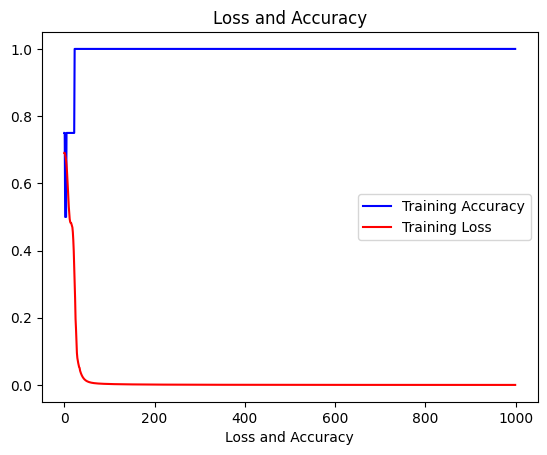

In [ ]:
#memvisualisasikan nilai loss dan akurasi model dalam tiap epoch training

acc = history.history['accuracy']
loss = history.history['loss']
epoch = range(len(acc))

plt.plot(epoch,acc,'b',label='Training Accuracy')
plt.plot(epoch,loss,'r',label='Training Loss')
plt.xlabel("Epoch")
plt.xlabel("Loss and Accuracy")
plt.legend(loc=0)
plt.title("Loss and Accuracy")
plt.show()

In [ ]:
loss, acc = model.evaluate(x_data,y_labels)

1/1 [==============================] - 1s 722ms/step - loss: 0.2715 - accuracy: 0.7500


In [ ]:
weights = model.weights

In [ ]:
print(weights)

[<tf.Variable 'dense_12/kernel:0' shape=(2, 2) dtype=float32, numpy=
array([[ 1.4761988, -2.1393528],
       [-1.6795963,  1.2929122]], dtype=float32)>, <tf.Variable 'dense_12/bias:0' shape=(2,) dtype=float32, numpy=array([-0.39528736, -0.17841017], dtype=float32)>, <tf.Variable 'dense_13/kernel:0' shape=(2, 4) dtype=float32, numpy=
array([[-0.21226072,  2.9439707 , -0.54294133, -0.72967744],
       [-0.34389687,  2.0883832 , -0.7521038 , -0.37677097]],
      dtype=float32)>, <tf.Variable 'dense_13/bias:0' shape=(4,) dtype=float32, numpy=array([ 0.        , -0.16947389,  0.        ,  0.        ], dtype=float32)>, <tf.Variable 'dense_14/kernel:0' shape=(4, 4) dtype=float32, numpy=
array([[-0.6618785 , -0.04073822,  0.7626236 , -0.12739438],
       [-0.85963476, -0.2675044 ,  3.5183232 , -0.430708  ],
       [-0.15483183, -0.7210004 , -0.80189747, -0.59587276],
       [ 0.5731066 , -0.2700063 , -0.1553253 ,  0.64654666]],
      dtype=float32)>, <tf.Variable 'dense_14/bias:0' shape=(4,) d

In [ ]:
prediction = model.predict(np.array([[1,1]]))
if prediction >= 0.5:
  print(1)
else:
  print(0)

1/1 [==============================] - 0s 25ms/step
0
